<a href="https://colab.research.google.com/github/Pullaganti-Sailaja/SuperstoreAnalysis/blob/main/W_ork_Life_Balance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd # collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np  # foundational package for scientific computing
import re           # Regular expression operations
import matplotlib.pyplot as plt # Collection of functions for scientific and publication-ready visualization
%matplotlib inline
import plotly.offline as py     # Open source library for composing, editing, and sharing interactive data visualization
from matplotlib import pyplot as pp
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.tools as tls
import seaborn as sns  # Visualization library based on matplotlib, provides interface for drawing attractive statistical graphics

import random
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
np.random.seed(123)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')


In [16]:
df = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')

In [17]:
df.drop({'Timestamp'}, axis=1, inplace=True)
df.head(2)

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,3,2,2,5,0,5,2,0,1,6,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,2,3,4,3,8,10,5,2,2,5,...,8,2,2,2,3,2,6,36 to 50,Female,655.6


In [19]:
df6 = df.pivot_table(values='TIME_FOR_PASSION', index=['AGE'], columns=['GENDER'], )
df6.head()

GENDER,Female,Male
AGE,,
21 to 35,3.322508,3.308142
36 to 50,3.209726,3.257969
51 or more,3.421650,3.573248
Less than 20,3.127700,3.653846


In [20]:
colomn = df.columns
colomn

Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION',
       'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE',
       'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [21]:
# Convert categorical features into numerical
df['GENDER'] = df['GENDER'].map( {'Female': 0, 'Male': 1} ).astype(int)
df['AGE'] = df['AGE'].map( {'Less than 20': 0, '21 to 35': 1, '36 to 50': 2, '51 or more': 3} ).astype(int)
dfcopy= df.copy()

<Axes: title={'center': 'Pearson Correlation of Features'}>

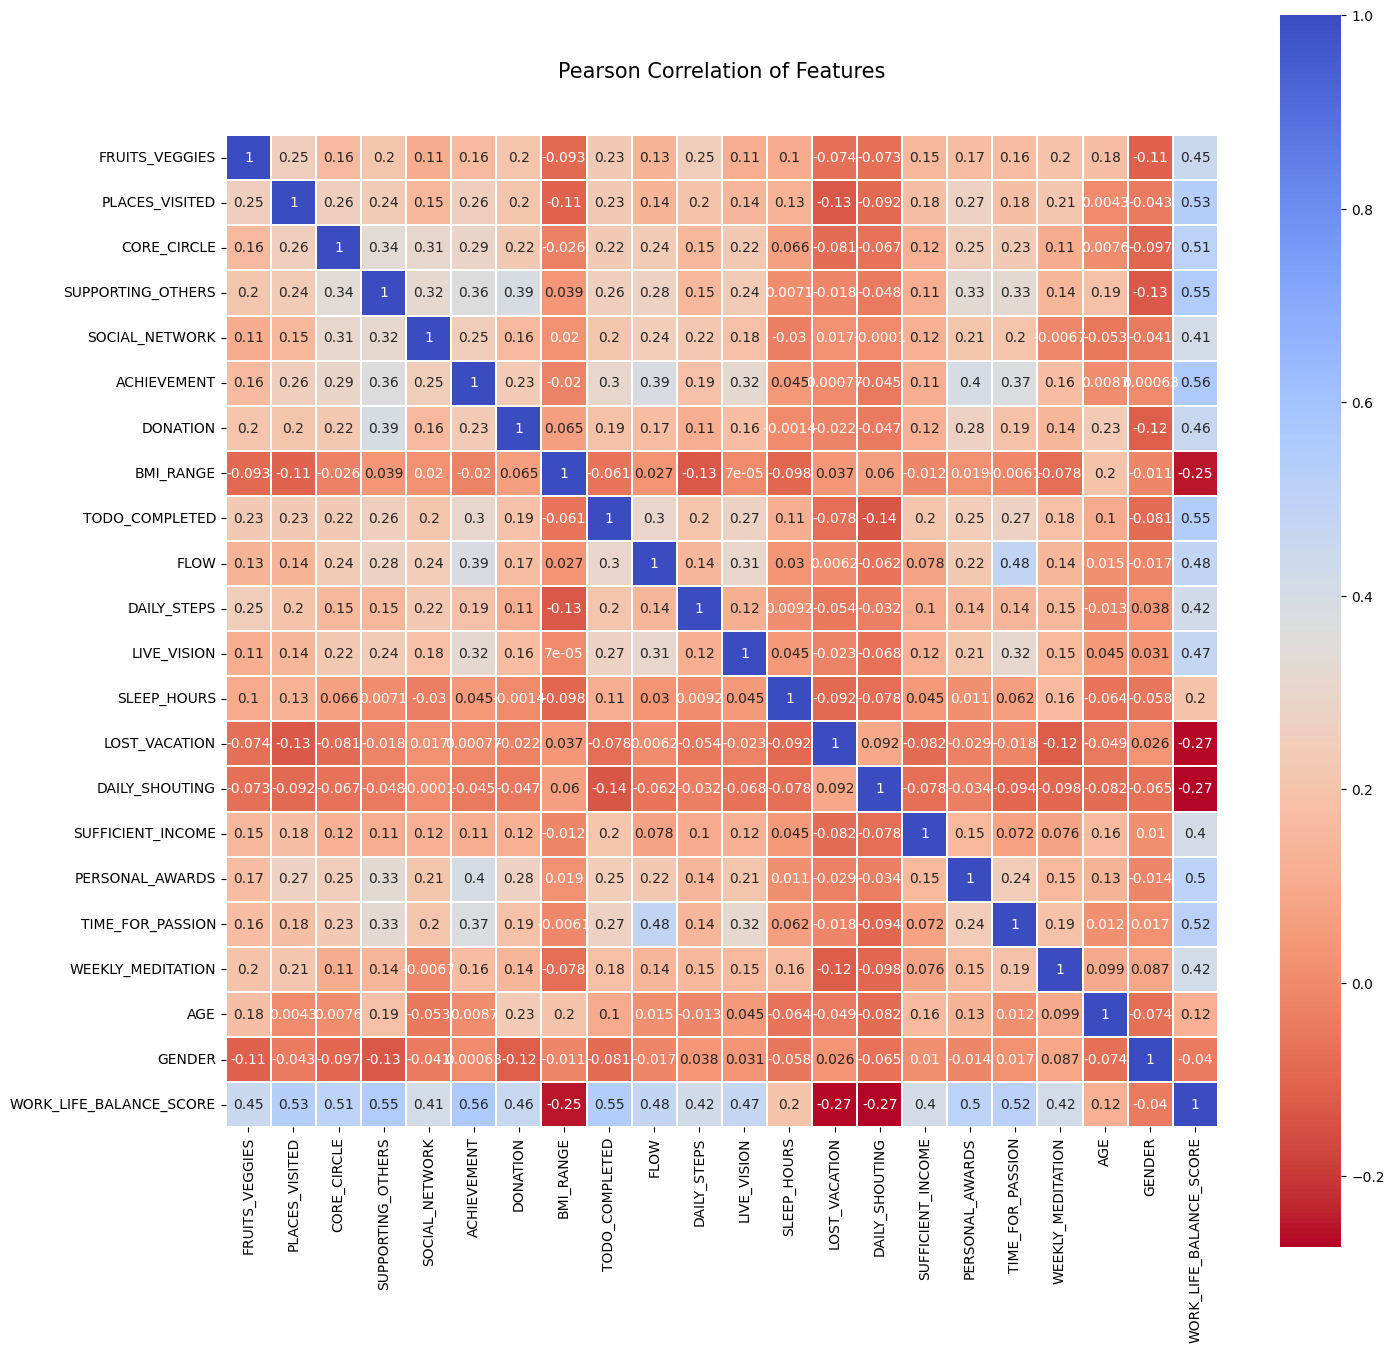

In [22]:
plt.figure(figsize=(16,16))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap='coolwarm_r', linecolor='white', annot=True)

In [23]:
factor = 0.2
average = df['TIME_FOR_PASSION'].mean()
df.loc[df['TIME_FOR_PASSION']  <= average*(1-factor), 'TIME_FOR_PASSION']=0
df.loc[df['TIME_FOR_PASSION']  >  average*(1+factor), 'TIME_FOR_PASSION']=1
df.loc[(df['TIME_FOR_PASSION'] >  average*(1-factor)) &
       (df['TIME_FOR_PASSION'] <= average*(1+factor)), 'TIME_FOR_PASSION']=None

In [24]:
average

3.326571500125219

In [25]:
dfcopy.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,3,2,2,5,0,5,2,0,1,6,...,7,5,5,1,4,0,5,2,0,609.5
1,2,3,4,3,8,10,5,2,2,5,...,8,2,2,2,3,2,6,2,0,655.6
2,2,3,3,4,4,10,3,2,2,2,...,8,10,2,2,4,8,3,2,0,631.6
3,3,3,10,3,10,7,2,5,2,3,...,5,7,5,1,5,2,0,3,0,622.7
4,5,1,3,3,10,4,2,4,2,5,...,7,0,0,2,8,1,5,3,0,663.9


In [26]:
df.dropna(inplace=True)

In [27]:
df_feat = df.copy()
df_feat.drop('TIME_FOR_PASSION', axis=1, inplace=True)
df_feat.head(2)

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,3,2,2,5,0,5,2,0,1,6,...,0,7,5,5,1,4,5,2,0,609.5
1,2,3,4,3,8,10,5,2,2,5,...,5,8,2,2,2,3,6,2,0,655.6


In [28]:
# Split test from train data
from sklearn.model_selection import train_test_split
X = df_feat
y = df['TIME_FOR_PASSION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:

label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']):
    X[column] = label_encoder.fit_transform(X[column])
knn= KNeighborsClassifier(n_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn.fit(X_train, y_train)
acc_predictions = knn.predict(X_test)
acc_knn = knn.score(X_test, y_test) # Return the mean accuracy
acc_knn

0.6891506067094932

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report \n',classification_report(y_test, acc_predictions))
print('\n Confusion Matrix')
cm = pd.DataFrame(confusion_matrix(y_test, acc_predictions), ['Actual: 0', 'Actual: 1'], ['Predicted: 0', 'Predicted: 1'])
print(cm)

Classification Report 
               precision    recall  f1-score   support

         0.0       0.72      0.73      0.73      1577
         1.0       0.65      0.63      0.64      1225

    accuracy                           0.69      2802
   macro avg       0.68      0.68      0.68      2802
weighted avg       0.69      0.69      0.69      2802


 Confusion Matrix
           Predicted: 0  Predicted: 1
Actual: 0          1159           418
Actual: 1           453           772


In [43]:
# Fit and predict
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_predictions = rfc.predict(X_test)
acc_rfc = rfc.score(X_test, y_test) # Return the mean accuracy
acc_rfc

0.7755174875089222

In [44]:
# Evaluate Model: classification and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report \n',classification_report(y_test, rfc_predictions))
print('\n Confusion Matrix')
cm = pd.DataFrame(confusion_matrix(y_test, rfc_predictions), ['Actual: 0', 'Actual: 1'], ['Predicted: 0', 'Predicted: 1'])
print(cm)

Classification Report 
               precision    recall  f1-score   support

         0.0       0.78      0.84      0.81      1577
         1.0       0.77      0.69      0.73      1225

    accuracy                           0.78      2802
   macro avg       0.77      0.77      0.77      2802
weighted avg       0.78      0.78      0.77      2802


 Confusion Matrix
           Predicted: 0  Predicted: 1
Actual: 0          1323           254
Actual: 1           375           850


In [45]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances[:5]

,importance
WORK_LIFE_BALANCE_SCORE,0.161499
FLOW,0.125098
ACHIEVEMENT,0.066552
SUPPORTING_OTHERS,0.056377
LIVE_VISION,0.056267


Text(0.5, 1.0, 'Feature Importance')

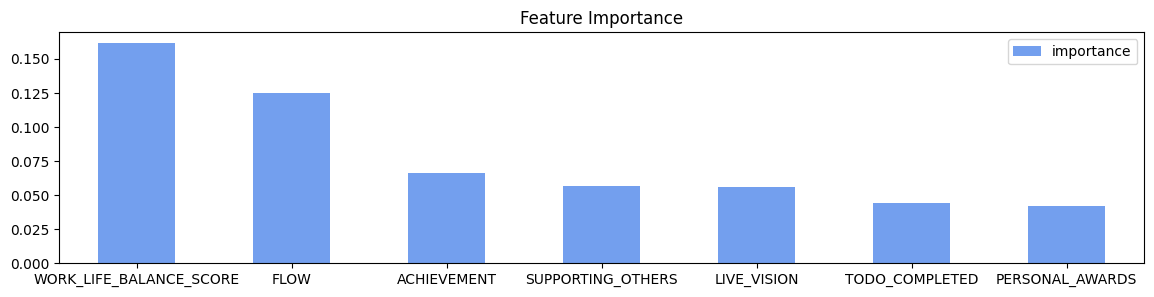

In [46]:
# Plot most important features
feature_importances[:7].plot(kind='bar', color=('cornflowerblue'), figsize=(14,3), alpha=0.9)
plt.tick_params(axis='x', rotation=0)
plt.title('Feature Importance') # : {}'.format(Category_labels[j]))

In [47]:
colomn

Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION',
       'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE',
       'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [52]:
from sklearn.ensemble import RandomForestClassifier
keyfeature = {'SLEEP_HOURS', 'DAILY_STRESS', 'ACHIEVEMENT', 'TIME_FOR_PASSION',  'SUPPORTING_OTHERS'}
factor = 0.1
rfc = RandomForestClassifier()

for name in keyfeature:
    df = dfcopy.copy()
    average = df[name].mean()
    df.loc[df[name]  <= average*(1-factor), name]=0
    df.loc[df[name]  >  average*(1+factor), name]=1
    df.loc[(df[name] >  average*(1-factor)) &
       (df[name] <= average*(1+factor)), name]=None

    df.dropna(inplace=True)
    df_feat = df.copy()
    df_feat.drop(name, axis=1, inplace=True)

    # Split test from train data
    X = df_feat
    y = df[name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    rfc.fit(X_train, y_train)
    rfc_predictions = rfc.predict(X_test)
    acc_rfc = rfc.score(X_test, y_test) # Return the mean accuracy

    # Plot most important features
    feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    colors = tuple(np.where(feature_importances[:7]>(0.9*feature_importances[:7].max()), 'cornflowerblue', 'yellow'))
    feature_importances[:7].plot(kind='bar', color=colors, figsize=(14,3), alpha=0.8)
    plt.tick_params(axis='x', rotation=0)
    plt.title('Most important features predicting {}'.format(name))

ValueError: could not convert string to float: '1/1/00'

TypeError: Could not convert 2333122434442333223145224544423153233513233235322335222424355321533112354312223511542244004434235533334422342222322255122232453443023432314441210233254254331535333225132332344433111231142212423232354444144444114114140114525530221521304245312235321334234334512221411441312352254221314303454322254113535123254132303253313142332434542321131333525213421402014334244212232221332231422325335222243314024443342233212224315511101141431422113112035124222312422344031253215513123241033252214233223322344402032213123332013341253214115423325332332011214130231304122134425333354433231411020031431205131430543322224323044555513232252223244413322310541244352322133433432223521553315123404113314133443403242234152012321252233241111421532112441441512354413223333232335434340332203114440353215351512334321322254134214333433423313311424433154220445355413454145242202433344342344232222233312243451334452444434414151413522331310121523214233223324242532331214231411313211122311330321334233331223414432135333002513322552323132453330311533235113444313332433322233053333355314213422133431243523454312302152552331543234234033435122200311131355242454152014255343551112222113341215323234432223522442355144345553244433414332335442155542331344424531305233352013212224435442342330524452243323411154232122142233353333333333333333333333333344512333333333333332423302213434233330342323132512412524043533323333443522443323142520233344420252452333332411541434235323234242241152415453222114343435315351243224555513454244532113552122100334131123231211124133315424245544323223240444433334343413233334331343333231531111334425325211135241232443531322324334035313251222332521113222242311341343245452240231323341425353551423253312225523335141451223220113413313242252244512431243552134303355445111234333311034314535453211314343345311425431334053333212043024543322340212424423223323100330132111354554421122252412214113342424333235434255525224344442143342315410534543311133323010522214442354141441122114343342143533244211311154114134514442531435133334441442134344413424311445400411522523541232544233211311141434455541221400035125512333001212531432422013232520332553253332444142333332543413210113431433512415022433343033542115444221431224153235325333444314423223133134443332442424332350333534310244433331531113322134422333331115441333444551434422444353531415122323545331235552232435513532134314424230232413221333331242210421222402532422352230421440413225412325434452142423252541132420255313423133413345124234350325544233242133300344322335542124431312242251205122424511354310141514244135144542513352433421455431433424225302232253435443354213535405333300553232543125113235235314242521423455533343533453414433325140231122314245532401441515454311423134545341313341243434313015152244043404233341024551234414235113223352224433323533223322111531354531122314153323331204422334331143243313141355421534332344334442333552353204433433155155514350453155541333325041224544425543302442003322155424342302532102425242245111435031243245033332415214111015211552411154252313533345053214333505254435351313532333232234333424331454032235552442314400153241143432442244342242452552304501554213352114444325143223335303002355205512333341411222332240242525421333303141331312142504335312312335532343411455531154345214233554555132252232243332423331344215332342342211211553345401531151323222214322223332333144104433355330435445021355514401002531351351253544445555333322243321312342131125311121134255411312333523523331135533541155551234514113345553321351231030124252223212225123331113151112541453355512243555134113535331442423313322345152221221343553510111122005433253555525235512122023320323312512335230130330245141503321251311121143252250143012255452524511543404233255512344233135522334222233525543525423405352223234113024533244342143335312454334432111213122531202542434213313133132223233452453542321332320231110342445253145203542335453325443223313411352112143013544443335343332241332243055133452535033040352343224055222344433125422434212221144530225243211331513543442111351244353344330324025132334533554321444131144235233133445222445233244214454321253532413153233551342522133045332554251533333324235342252441542325533513522423101231223351432244222012523554212242222252514533321343222345333522543143432225034425344444150433222214335434351433523433333543413154135324214340133343023531550522220024233453233453231343422215522053122154325242224244435542235523354403223244453233323324141214222245231432344454321224321442554431253043352313344144444114432233512421120054034424553344344444223143252322421521244402202555223411454123511311332313241113124324432301553223153430403422240241512341013235542332331333432341323455345415114314352232333445224233503111441123303344405325133445540400521231325424552304131335103442251252233121134341212244343353352253310322511324355133203413342233313333221440352333424243331203334532535313341342121053253343233314552334334135343533353343333413313423033321333210222053133114313233113020114335130412523341435132331215223323222324133351335125145211342233055333314413033333211243423432523522301324335532233353230342432514443442312351152343511335221350442333355332344423225514012541213215231432433433224144443211434125323414443333233234414553532440112242235451442433433411105123352223333443251524041451030521222433233522322421031454344532333523144254423141111143432114322455135224331531521333525244351233332035324403442333152332131322122233521322423344423422432534545134223422125334233344333433413133213323342221245253555141415422323232213133224233043142352041342332230343334045544313242122443132125232520213244422234514111143320022113553325211153235441432312342223325303330402333135331233135333330140323125431243543532314031124342145342231353214201231222255333314353015323443243204331143440414145145312003055424340334131251121244222541511411543003313335255214333424422510254514332155120243533511433533405232235514333022332135335010211203212323023121344415554332031432333221113103101211221422322333133213332421202221321433211331502325215312330332533303332333331232132013412342330043325222440205305255444343232303324143342225230351414022133301113343335552444111332155521533231313504430011351533323140233422231244334425555341243104344345554321434444433413243453333322432124441344534443251234553052423120034311343101353225454344355333411251455511222353322242141322432421235534322135341443312124335455313325552251540311352114314333541242124334123332355343233533422333122225223224412344522423333454325112234340055533512114232424421212532312224232235255215414030255243422114052554351134423342432344423223313142202522222243535132122220014310033245413324230033223322243154541554143452233131421231124254133230444332332533351230505543323312323355552355204143332215152430221151520323155514413205430322344343115232401313223252004124321214551223253015143133123532020125211524232232331233032554343334323340411425443202223442314422231224303232234242345251231511253232140003133144333425343033121125354331230331211232215123442422523123221541451041123303231214444420445324234535412542235243151331111215332233221355235322422341341113115524313433322322231434343211503431333113432323453440413345355054441132303144333132124135344331424224351235542132224102133132325131253345131013322354151351221231433343333112230531435224535133501303133121354350213232443423512322533333502122435553432325323451230423241141352422234553143241234323334422412035225521424233422321213353531342143023542553423235534141223445333333335240212554153215535323242344333424343344153142223144324124224254311222534542531345223232311241334133233355533333443234444433235521122202222332120232323444425505345232411333344432434533442113023122230355544131231040110031311111134133432202354552423344311443233551353233525345533553223424234412512331242133314215441144311153225525532450325113452443145222343421454345345552253332225232353132334334333324221254332542323544311233253233123123345031343333542334311134342445123123420334530031334512034342432523323534242343224242233031015312422423513534243133442213412414245545411255242132133435535423335424333424313343143341535143133032102423421043154123555444434131311513545015332333035324523310231123222354033550344130431531412422422341514424241132112143431414425522231512204321223344135423324433255112022235332232234342145333221132142223314332255121413252215442125332452330343542312231224322152211551313342331232113243242023425224222253423532512421331513235511312344523325235234303545145434344135243515113433531145455141334431523331315441543332424432311110342211022531421224221045034404455024142334210312545223434305223122143112511134514513132413534440421345214032515333324142444242423332124423155332433221252111253235325143355432453144335143313343313424024433135441240533441101314110232502333251125253113343142431511455213134214453354213353143313201524300523513544433330234351114232421145231335524151354354341201324213423354232523333213345123425451153445505241355441352133333434434121344212345254311122041221333433152511333323111255433125424331211132432012251244332130513043443341330213434005001011233233111233454141430332010312230532344224435301313412145425442332045324121333315425331255332335244252232124032333124343342531523233244341253343540333333150324424142411221432234411233233245214021223233245341331114214345152223532115204121501113211223245153135422322343355455155343443345433415250303553342211324051111114125342310541532201413455220242224334332345224324503332524423431342044532441554342412325343431330334043334152313133332222111113001222332115422242125313321321331110314013143321222235422333245121321423235021233333322002533332223544123223533342313531443414153432430521524222533322445353112441352541443443351122324233524503134542144251035325333223421134502313450343312341415342413234224124210444331354225312411110231223525311124345201443333152524352401235543315342121342142344322345525422322431225252413440543544212453012433530133233212531532512224431353521232322232333532412421224322124344134444032444132253123122232321133534312330014332343232110313533443112325221/1/0025424245334223025311113255545444511313532020101414244353313333155231433452142144214233415144232232134021212225205212315443255215221143453454523423330435034352425531111153324334341551154153321033102444434522242512351225144434555111421255323232524213421353121222232142313344312230225511244334225533231135442531235111234333333005541333222345513343545113241234533324141425214423321154544441530524455130303233113333223253330325444313434134124224313312154535253312235332442033144452125333254203313343333144431243133532222444333433124211322551232253351434543311554323303145323014123433253212123323312152314535334303111254454151344533511542332343534125451322320335133344430543302322543341031425321413012420523121531313343332441132321533122533224312152121104325134455142225344425413543514324123033203333214133314214532123344242344431034330241334242222433545254433333414552444243343332232422434323515112551513442303215524433121252132125314442133250242453323355344222225252545543134233341354404555353335552301425415302224331233544513555131334343423513312330334552425232121113335323344401114211315121323455422340025304443153134235453531111445553344333333315415141533313512314155444435243433353240522332505351141432140301433304232532434235453420541135531324323240244304352342422441353221331020211422124454422053311021142545522132112235141231132401105124455522122312511131443223210143015242510452115214553544034314313131233525425130233321341425141215123253333334332231403511531140212114323215323322222223144115554041223233043131412433343332242023245353525332243141513345021443404333220435553452141551513534541421551544232243132452223333222323311130452422443510520202513521554524121355453431311232542351424333453351152303342504032124415333555123213124345211353413523241253544234215345333104334443335545545342344241334331343445245434422123313432331133443451020221414233532133443335203252221232513455235252223152413230334124311353355333003223533352221133255333533153322124022041401522343323513535345111503144551111354244342551121411552544431245550131140322433513132113322530412414444233220433234354150302331514411433333254134553522434222312114143223431140124042522443423311335234523234421323355022335114052524244141114313352322332355122442421334241334321111414234133533232434443041202113325554435210433214335313254333553440343315444431312323253325523234131344435334022321212233223103231522223153533335142445522201434312232144421433435423213522451355133435012132443423244555443134144333142322203334433344423015112440332222141221153402322224133244431433222321231451311524133131043332133250332532353243333344053042524045423332344521332252432343441332122343235233313431154231422333543341324231153322214355222333053324255233131322355131333323444325433225124441215443543432155125352442123304535433435432035355334231114432413151133235024243523241333225151355243233225401243452043333424441545435153342331413333314545353550233425243543114453342333254144124224234353244131425420420552444532425230333431035244522343223425413422231231435103340225321331323243232424223250351111322210242443511332333353324452243533450344113133333222113333031201243113343325423133442242411331134511443532042133335102423333534424225425422212432313335334310153553323133334221443121244544225323352332442415534345342252423211123434334132531001115533135522424224112132002124400225251321313331422554013214133322333522232311222124232135333234524353354452321132232212343421033223500114303542352521454423301235511423215014344332041441312135342231513340123355423243422123313322333214203121033233314221551321254143445513134133235314053534512325143222350324401123223523414442455233323115425223141225553150143254231240012325223523522334212523331132343331514434125224412355154352424522131414022342142213313414334313443254311501434542314022530023312213343325143224424454401142322222221045234314352442323254442442543421332352534432532251144023212422133443454141543023314305332234433134435334134412121413331325245344354524232554324543241513343542332133151543544423520112324335211223224223333413224131432432125211142213132112021444534525544330342243342522133144423552253151041253522412520533253414222233411524320312434143441335421212331221411444203351242221453511244331232432344233115333041244334412234234325352334423323343252320055055352404344321210455423414522214532533144413321344314312240412511534012432441342344341414335222333333234142123454352312302323211354241355223335554543123231242345252552423441303141214333453335454333213144242513423152142541222412443315334241213454051232245332351143133441034523123342325335155313401531222525453232134533133144232242323225133204253225234355325333134531204335425343235543233453122521133444232342133542124455454153523423235222342323123435523232323454122134335341342513221432552435413252442233241534243255252114102243001533305522224214514341253343213155223423523335214435112554540122341434245542412332342032542123124455253353432423134335353412112324313112144432214431342145334332433122152444214153213343113035221511532253323411432133353343332352322355225433311534041521250441332322043434135112244121113323343323311523325213532353134241440433133323314124242423341323331145231442113421131342433213244355442222342455223354511234535143341103423343240134324343241450202535334245432333333542434234422315432201211243423141244223323333422041115111521421322245142312404355342411442323432220522433232435043141302353323544231342231244454454433011112250332241334403233545535234541243105553524242544215541335233023224253312311154454324131330321433423543333211423215342432543432443342354441523423241221334411330353223223112142553523431153133212553215355351143521433342233451243445341134224255132523322433231244422131344340534453451233431430533422542241211543133310222413343351013221323432545544143045013244512543112135521431415323434233354331525551342232423342542353332211534341044232555131431134044342152111255512243441422210542233242241205324245331334244124314231333333424321242443532152455450314433314 to numeric

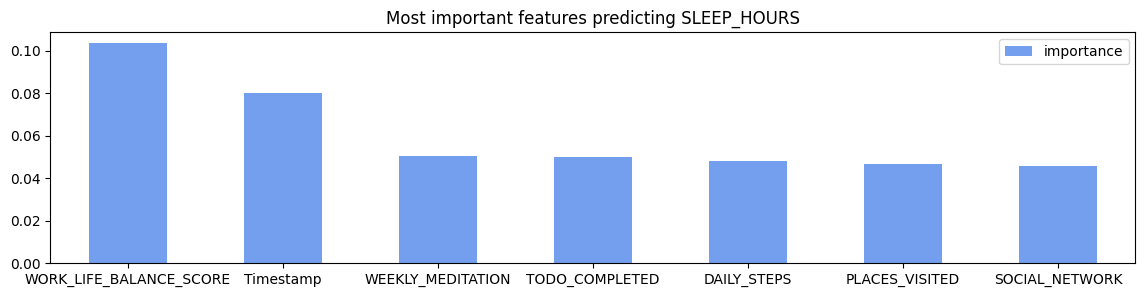

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')

# Define key features and factor
key_features = ['SLEEP_HOURS', 'DAILY_STRESS', 'ACHIEVEMENT', 'TIME_FOR_PASSION', 'SUPPORTING_OTHERS']
factor = 0.1

# Initialize RandomForestClassifier
rfc = RandomForestClassifier()

# Iterate over key features
for name in key_features:
    df_copy = df.copy()
    average = df_copy[name].mean()

    # Apply thresholding
    df_copy.loc[df_copy[name] <= average*(1-factor), name] = 0
    df_copy.loc[df_copy[name] > average*(1+factor), name] = 1
    df_copy.loc[(df_copy[name] > average*(1-factor)) & (df_copy[name] <= average*(1+factor)), name] = None
    df_copy.dropna(inplace=True)

    # Prepare X and y
    X = df_copy.drop(name, axis=1)
    y = df_copy[name]

    # Encode categorical variables
    label_encoder = LabelEncoder()
    for column in X.select_dtypes(include=['object']):
        X[column] = label_encoder.fit_transform(X[column])

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

    # Fit RandomForestClassifier
    rfc.fit(X_train, y_train)

    # Predict and evaluate
    rfc_predictions = rfc.predict(X_test)
    acc_rfc = rfc.score(X_test, y_test)

    # Plot feature importances
    feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    feature_importances[:7].plot(kind='bar', color=('cornflowerblue'), figsize=(14,3), alpha=0.9)
    plt.tick_params(axis='x', rotation=0)
    colors = (np.where(feature_importances[:7]>(0.9*feature_importances[:7].max()),'','lightgray'))

    plt.title('Most important features predicting {}'.format(name))